<a href="https://colab.research.google.com/github/pedro9olivares/ML_and_AI_for_the_Working_Analyst/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción: carga de datos y exploración

In [ ]:
!pip install -U yellowbrick

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler  # Para estandarizar varibles
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#from google.colab import files  # Función para subir archivo csv a google colab

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
datos = pd.read_csv('https://raw.githubusercontent.com/pedro9olivares/ML_and_AI_for_the_Working_Analyst/main/1_Topic_modeling_y_LDA/Datos/train_input_kmeans.csv',
                    index_col=['ID'],
                    parse_dates=['Date'])

In [ ]:
datos.drop(['Date'],axis= 1, inplace=True)
datos.head(3)

,Temperature,Humidity,Humex,CO2,Bright
ID,,,,,
0,22.7,56.0,25.7,534.0,1.0
1,22.8,55.0,25.7,506.0,1.0
2,22.9,55.0,25.9,577.0,1.0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Humex        8000 non-null   float64
 3   CO2          8000 non-null   float64
 4   Bright       8000 non-null   float64
dtypes: float64(5)
memory usage: 375.0 KB


En caso de que haya datos faltantes:
1. Remover renglones con valores faltantes

  `dropna()`
2. Rellenar valores faltante con el promedio, la mediana o la moda de la columna:

  `fillna(df.columna.mean())`,
o utilizar algún valor estimado mediante otro modelo de aprendizaje de máquina.

In [ ]:
datos.isna().sum()

Temperature    0
Humidity       0
Humex          0
CO2            0
Bright         0
dtype: int64

In [ ]:
datos.describe()

,Temperature,Humidity,Humex,CO2,Bright
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,22.94535,33.790750,22.668763,586.471000,41.596375
std,1.62307,8.241068,2.578996,202.641522,76.855898
min,17.90000,16.000000,15.500000,361.000000,1.000000
25%,22.10000,27.000000,21.100000,452.000000,1.000000
50%,23.20000,33.000000,22.800000,493.000000,1.000000
75%,24.10000,41.000000,24.300000,693.250000,58.000000
max,28.30000,58.000000,32.100000,2168.000000,882.000000


#Distribución y correlación entre las variables

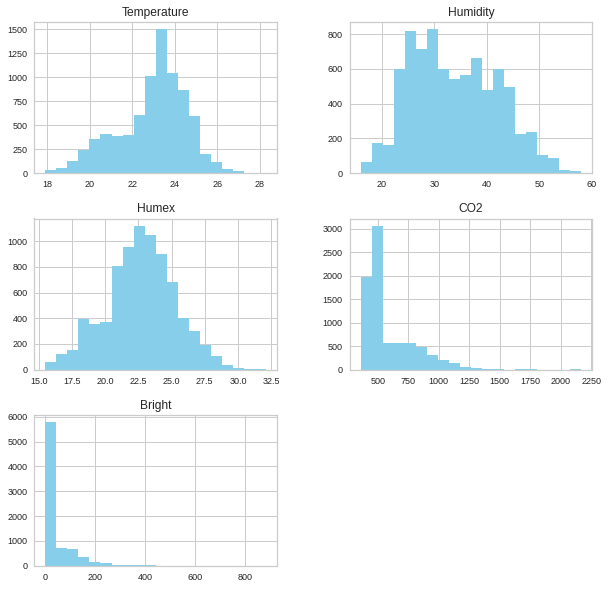

In [ ]:
# Distribuciones
datos.hist(figsize = (10,10), xlabelsize=9, ylabelsize=9,
                               color='skyblue', bins=20)
plt.show()

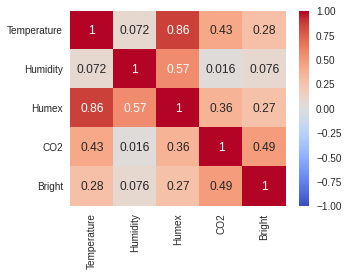

In [ ]:
# Matriz de correlación
def correlacion(dataframe, grafica = True):
    corr=dataframe.corr()                
    fig = plt.figure(figsize = (5, 4))
    if grafica == True:
        sns.heatmap(corr,  cmap="coolwarm", 
                    vmin=-1, vmax=1,  center=0, 
                    annot=True, square=False)
        fig.tight_layout()
    return corr
correlaciones = correlacion(datos)

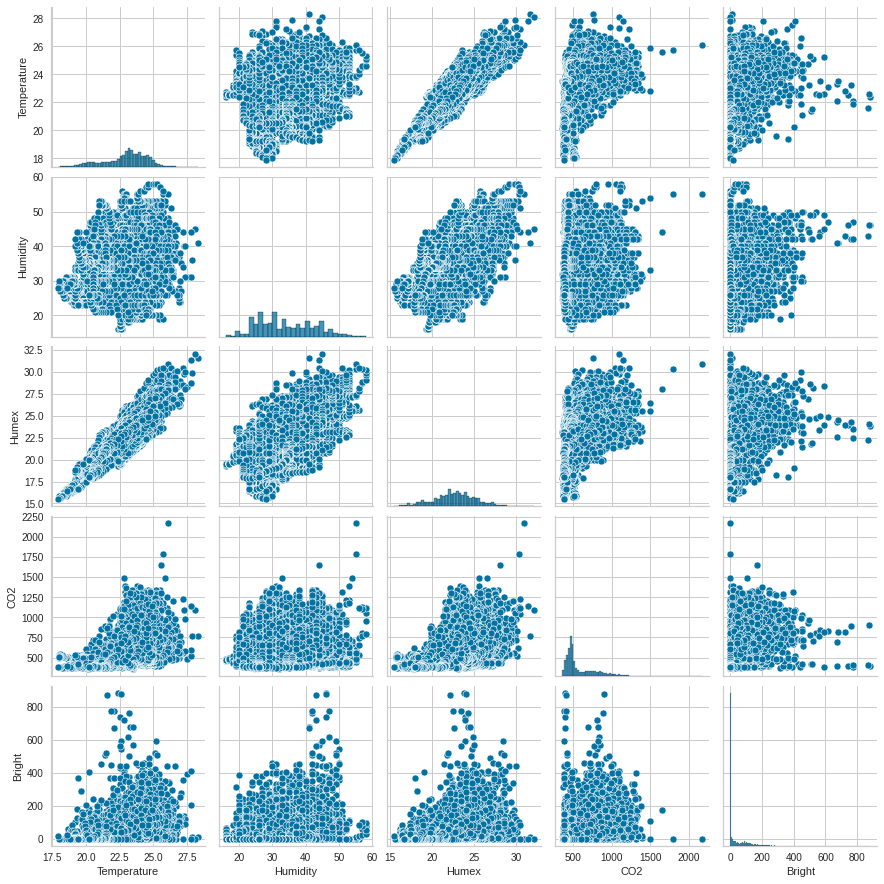

In [ ]:
# Relaciones binarias 
g = sns.pairplot(datos, palette ='Dark2')

plt.show()

#Escalamiento de los datos

In [ ]:
datos_escalados = datos.copy()
columnas = datos.columns

escala = StandardScaler()

datos_escalados[columnas] = escala.fit_transform(datos[columnas])

In [ ]:
datos_escalados.describe()

,Temperature,Humidity,Humex,CO2,Bright
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-1.114664e-15,-2.658151e-16,-1.783407e-15,1.110639e-16,2.721740e-15
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.108716e+00,-2.158927e+00,-2.779846e+00,-1.112729e+00,-5.282472e-01
25%,-5.208664e-01,-8.240648e-01,-6.083223e-01,-6.636320e-01,-5.282472e-01
50%,1.569038e-01,-9.595837e-02,5.089024e-02,-4.612917e-01,-5.282472e-01
75%,7.114430e-01,8.748503e-01,6.325483e-01,5.269684e-01,2.134469e-01
max,3.299293e+00,2.937819e+00,3.657170e+00,7.805053e+00,1.093548e+01


#Selección del número de clústers (k)

**Coeficiente de Silhouette**

El coeficiente de Silhouette evalúa la cercanía entre puntos de un mismo clúster al mismo tiempo que la distancia a los clústers vecinos.

El coeficiente de Silhouette oscila entre -1 y 1 donde 1 indica un clúster de alta densidad y -1 que no existe densidad alguna.


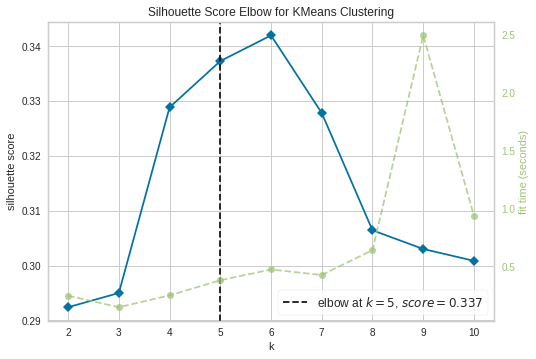

In [ ]:
codo = KElbowVisualizer(KMeans(random_state=3), metric='silhouette')
codo.fit(datos_escalados.iloc[:,0:5])
codo.poof()

# K-means

In [ ]:
# K-means con k = 6
model = KMeans(n_clusters = 6, random_state=3).fit(datos_escalados)
clusters = model.predict(datos_escalados)

In [ ]:
# Iteraciones realizadas
model.n_iter_

12

In [ ]:
# Centro μ de cada clúster
model.cluster_centers_

array([[ 0.27699477, -0.80419449, -0.19262543, -0.38441162, -0.41070278],
       [ 0.11338787,  1.1343014 ,  0.65799586, -0.51698152, -0.37725173],
       [ 1.10062394,  0.94687695,  1.44112873,  1.27993291,  0.69938073],
       [ 0.62776771,  0.54425597,  0.80154034,  0.98015254,  3.89257282],
       [-1.58210042, -0.26225429, -1.41531404, -0.64865016, -0.38031055],
       [ 0.55240558, -0.59762843,  0.13107767,  1.53395492,  0.73860408]])

In [ ]:
# Renombramos los clústers (de 0,1,2,3,4 a 1,2,3,4,5)
datos['cluster'] = clusters + 1

In [ ]:
# Tenemos a qué clúster pertenece cada registro
datos

,Temperature,Humidity,Humex,CO2,Bright,cluster
ID,,,,,,
0,22.7,56.0,25.7,534.0,1.0,2
1,22.8,55.0,25.7,506.0,1.0,2
2,22.9,55.0,25.9,577.0,1.0,2
3,23.0,55.0,26.1,630.0,1.0,2
4,23.0,55.0,26.1,643.0,1.0,2
...,...,...,...,...,...,...
7995,20.5,26.0,18.4,390.0,5.0,5
7996,20.4,26.0,18.3,383.0,2.0,5
7997,20.3,26.0,18.2,377.0,1.0,5


In [ ]:
# Porcentaje de registros en cada clúster
datos['cluster'].value_counts(normalize=True).sort_index()*100

1    29.9250
2    24.0000
3     9.2875
4     3.0375
5    19.5750
6    14.1750
Name: cluster, dtype: float64

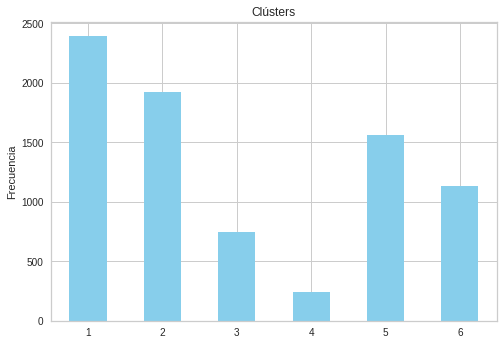

In [ ]:
# Visualización en 2D
g = datos.cluster.value_counts().sort_index().plot(kind='bar', 
                                                rot=0, 
                                                color='skyblue',
                                                )
g.set(ylabel='Frecuencia', title='Clústers')
plt.show()

In [ ]:
# Visualización en 3D
muestra = datos.sample(2000)

fig = px.scatter_3d(muestra, 
                    x='Humidity', y='Temperature', z='Bright',
                    color='cluster',
                    title="3D Scatter Plot", 
                    size='CO2'
                    )
fig.show()

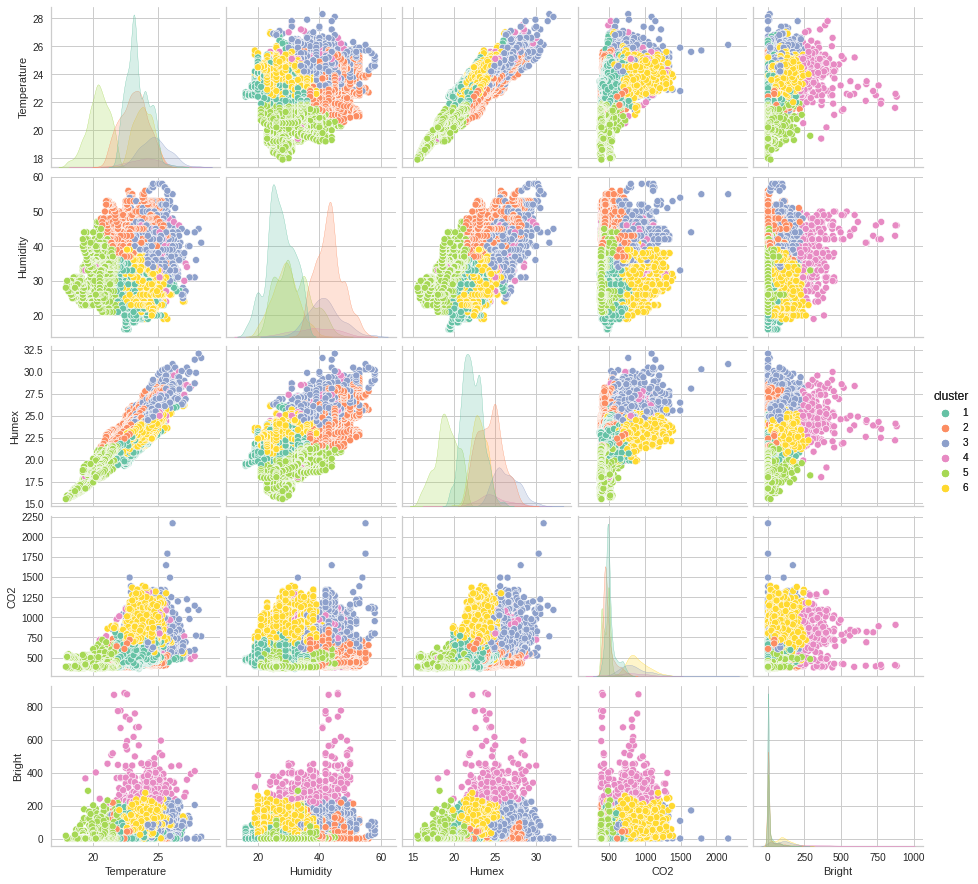

In [ ]:
# Visualización en relaciones binarias
mediciones = ['cluster', 'Temperature', 'Humidity', 'Humex', 'CO2', 'Bright']


g = sns.pairplot(datos[mediciones], hue='cluster', palette='Set2', )
g.add_legend()
plt.show()